In [54]:
import joblib
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.manifold import TSNE, Isomap
import time

# Load Data

In [55]:
df = pd.read_csv("./dataset.csv")

feature_names = df.columns.tolist()
print(feature_names)

['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [56]:
X = df.drop(columns=['status', 'name'])
t = df['status'].astype(int)

# Load Models

In [57]:
# Load the models fot Task 1: 

svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')

# Split Data

In [58]:
# PIPELINE: If the data is seperated in Data X and Target y
X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size =0.2,
                                                    random_state=42,
                                                    shuffle=True, 
                                                    stratify=t)

# Evaluation SVM 

In [59]:
start_time = time.time()
y_train = svm_model['Model'].predict(X_train)
y_test = svm_model['Model'].predict(X_test)
testing_time = time.time() - start_time

print(f"Training inference time for the SVM model is {testing_time:.1f} s")

Training inference time for the SVM model is 0.1 s


Training set performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       118

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

Test set performance:
Accuracy: 0.979
Precision: 0.875
Recall: 0.966
F1 Score: 0.918
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       210
           1       0.88      0.97      0.92        29

    accuracy                           0.98       239
   macro avg       0.94      0.97      0.95       239
weighted avg       0.98      0.98      0.98       239



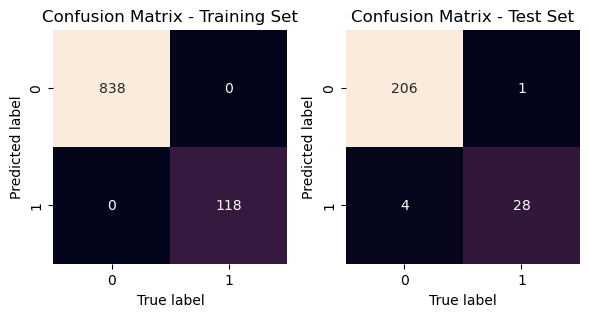

In [60]:
# TRAINING SET PERFORMANCE
print('Training set performance:')
accuracy_train = metrics.accuracy_score(t_train, y_train)
print("Accuracy: %.3f" % accuracy_train)
precision_train = metrics.precision_score(t_train, y_train)
print("Precision: %.3f" % precision_train)
recall_train = metrics.recall_score(t_train, y_train)
print("Recall: %.3f" % recall_train)
f1_train = metrics.f1_score(t_train, y_train)
print("F1 Score: %.3f" % f1_train)
print(metrics.classification_report(t_train, y_train))

# TEST SET PERFORMANCE
print('Test set performance:')
accuracy_test = metrics.accuracy_score(t_test, y_test)
print("Accuracy: %.3f" % accuracy_test)
precision_test = metrics.precision_score(t_test, y_test)
print("Precision: %.3f" % precision_test)
recall_test = metrics.recall_score(t_test, y_test)
print("Recall: %.3f" % recall_test)
f1_test = metrics.f1_score(t_test, y_test)
print("F1 Score: %.3f" % f1_test)
print(metrics.classification_report(t_test, y_test))

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Confusion Matrix for the Training Set
cm_train = metrics.confusion_matrix(t_train, y_train)
sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[0])
axes[0].set_xlabel('True label')
axes[0].set_ylabel('Predicted label')
axes[0].set_title('Confusion Matrix - Training Set')

# Confusion Matrix for the Test Set
cm_test = metrics.confusion_matrix(t_test, y_test)
sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[1])
axes[1].set_xlabel('True label')
axes[1].set_ylabel('Predicted label')
axes[1].set_title('Confusion Matrix - Test Set')

# Display the plot
plt.tight_layout()
plt.show()

In [61]:
print(f"Training Time of the SVM: {svm_model['Training Time']:.1f} s")

Training Time of the SVM: 1.4 s


# Evaluation Random Forest

In [62]:
start_time = time.time()
y_train = rf_model['Model'].predict(X_train)
y_test = rf_model['Model'].predict(X_test)
testing_time = time.time() - start_time

print(f"Training inference time for the Random Forest model is {testing_time:.1f} s")

Training inference time for the Random Forest model is 0.0 s


Training set performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       118

    accuracy                           1.00       956
   macro avg       1.00      1.00      1.00       956
weighted avg       1.00      1.00      1.00       956

Test set performance:
Accuracy: 0.979
Precision: 0.875
Recall: 0.966
F1 Score: 0.918
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       210
           1       0.88      0.97      0.92        29

    accuracy                           0.98       239
   macro avg       0.94      0.97      0.95       239
weighted avg       0.98      0.98      0.98       239



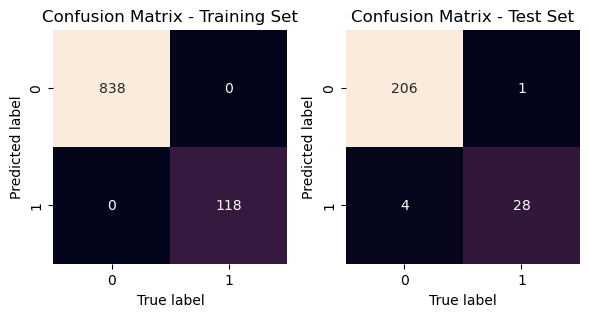

In [63]:
# TRAINING SET PERFORMANCE
print('Training set performance:')
accuracy_train = metrics.accuracy_score(t_train, y_train)
print("Accuracy: %.3f" % accuracy_train)
precision_train = metrics.precision_score(t_train, y_train)
print("Precision: %.3f" % precision_train)
recall_train = metrics.recall_score(t_train, y_train)
print("Recall: %.3f" % recall_train)
f1_train = metrics.f1_score(t_train, y_train)
print("F1 Score: %.3f" % f1_train)
print(metrics.classification_report(t_train, y_train))

# TEST SET PERFORMANCE
print('Test set performance:')
accuracy_test = metrics.accuracy_score(t_test, y_test)
print("Accuracy: %.3f" % accuracy_test)
precision_test = metrics.precision_score(t_test, y_test)
print("Precision: %.3f" % precision_test)
recall_test = metrics.recall_score(t_test, y_test)
print("Recall: %.3f" % recall_test)
f1_test = metrics.f1_score(t_test, y_test)
print("F1 Score: %.3f" % f1_test)
print(metrics.classification_report(t_test, y_test))

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Confusion Matrix for the Training Set
cm_train = metrics.confusion_matrix(t_train, y_train)
sns.heatmap(cm_train.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[0])
axes[0].set_xlabel('True label')
axes[0].set_ylabel('Predicted label')
axes[0].set_title('Confusion Matrix - Training Set')

# Confusion Matrix for the Test Set
cm_test = metrics.confusion_matrix(t_test, y_test)
sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False, ax=axes[1])
axes[1].set_xlabel('True label')
axes[1].set_ylabel('Predicted label')
axes[1].set_title('Confusion Matrix - Test Set')

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
print(f"Training Time of the Random Forest model: {rf_model['Training Time']:.1f} s")

Training Time of the Random Forest model: 45.0 s
